In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy_financial as npf
from pandas import ExcelWriter
from time import time
from datetime import datetime

import gc
#import pickle5 as pickle

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

CABECERA_MES="MES "
NUM_MESES=92

##file_name='Tipologia 40 vi jupyter Rev'
##sheet_name=' Viabilidad 40 manteniendo+ ESE'
##sheet_name=' Viabilidad40manteniendo+2plESE'
##sheet_name=' Viabilidad40manteniendo+1plESE'
##sheet_name=' Viabilidad 40 manteniendo+2pl'
##sheet_name=' Viabilidad 40 manteniendo+1pl'
##sheet_name=' Viabilidad 40 NE'
##sheet_name=' Viabilidad 40 NE ampliando 2pl'
##sheet_name=' Viabilidad 40 NE ampliando 1pl'

##file_name='Tipologia 22 vi jupyter Rev'
##sheet_name=' Viabilidad 22 manteniendo+ ESE'
##sheet_name=' Viabilidad22manteniendo+2plESE'
##sheet_name=' Viabilidad22manteniendo+1plESE'
##sheet_name=' Viabilidad 22 manteniendo+2pl'
##sheet_name=' Viabilidad 22 manteniendo+1pl'
##sheet_name=' Viabilidad 22 NE'
##sheet_name=' Viabilidad 22 NE ampliando 2pl'
##sheet_name=' Viabilidad 22 NE ampliando 1pl'

##file_name='Tipologia 8 vi jupyter Rev'
##sheet_name=' Viabilidad 8 manteniendo+ ESE'
##sheet_name=' Viabilidad8manteniendo+2plESE'
##sheet_name=' Viabilidad8manteniendo+1plESE'
##sheet_name=' Viabilidad 8 manteniendo+2pl'
##sheet_name=' Viabilidad 8 manteniendo+1pl'
##sheet_name=' Viabilidad 8 NE'
##sheet_name=' Viabilidad 8 NE ampliando 2pl'
##sheet_name=' Viabilidad 8 NE ampliando 1pl'

file_name='Tipologia 88 vi jupyter Rev'
##sheet_name=' Viabilidad 88 manteniendo+ ESE'
##sheet_name=' Viabilidad88manteniendo+2plESE'
##sheet_name=' Viabilidad88manteniendo+1plESE'
##sheet_name=' Viabilidad 88 manteniendo+2pl'
##sheet_name=' Viabilidad 88 manteniendo+1pl'
##sheet_name=' Viabilidad 88 NE'
##sheet_name=' Viabilidad 88 NE ampliando 2pl'
sheet_name=' Viabilidad 88 NE ampliando 1pl'

##RUTA ANGEL:
##ruta='C://Users//angel//'

##RUTA LUIS:
##ruta='C://Users//luism//Dropbox//Angel-Luis//sensibilidad 20221010//'
ruta='C://Users//luism//'

##Elegir el experimento que estamos ejecutando
##tipo_expedimento='TODO'
##tipo_expedimento='COSTES'
tipo_expedimento='INGRESOS'

## Rutas salida
ruta_comun='sensibilidad//data//'
ruta_hoy=(datetime.today().strftime('%Y%m%d %H%M'))
rutaSalida=ruta+ruta_comun+file_name+'//'+sheet_name+'//'+tipo_expedimento+'//'+ruta_hoy+'//'
rutaEntrada=ruta+ruta_comun+file_name+'//'+sheet_name+'//'+tipo_expedimento+'//'+ruta_hoy+'//'


## El bueno
data = pd.read_excel(
   io=ruta+ruta_comun+file_name+'.xlsx',
   sheet_name =sheet_name, dtype = {"COEFICIENTE":float, "VALOR":float, "VALOR CALCULADO":float, "IMPORTES TOTALES":float}
)
    
gc.collect(generation=2)

data=data.fillna(value=0)
data = data.set_index('ELEMENTO')

In [2]:
ajusteValorPrestamoLargo=372910
ajusteValorPrestamoCorto=165698.28
## Podría venir cargado de la matriz. Tal cual se ha cambiado,  Aclarar si esto es Valor, Valor Calculado o que.
data.loc['Intereses prestamo largo', 'VALOR CALCULADO']=-ajusteValorPrestamoLargo
data.loc['Intereses prestamo corto', 'VALOR CALCULADO']=-ajusteValorPrestamoCorto

data.loc['Intereses prestamo largo', 'VALOR']=ajusteValorPrestamoLargo
data.loc['Intereses prestamo corto', 'VALOR']=ajusteValorPrestamoCorto


##Columnas VALOR elemento, elementosDependientes
matrizValorElementosDependientesDeValorCalculado_ORDEN2=[
                ['IVA', ['Informes previos', 'Topografia', 'Geotecnico']],
                ['Proyecto demolición', ['Demolición']],
                ['D.O. demolición', ['Demolición']],
                ['CSSE_1', ['Demolición']],
                ['Proyecto nueva ejecución', ['Vivienda', 'Rehabilitación']],
                ['D.O. nueva ejecución', ['Vivienda', 'Rehabilitación']],
                ['CSSE_2', ['Vivienda', 'Rehabilitación']],
                ['Gestión- Project Management', ['Demolición','Vivienda', 'Rehabilitación']],
                ['OCT', ['Vivienda', 'Rehabilitación']],
                ['Derribo', ['Demolición']],    
                ['Nueva edificacion', ['Vivienda', 'Rehabilitación']],
                ['LICENCIA nueva ejecución', ['Vivienda', 'Rehabilitación']],
                ['LICENCIA derribo', ['Demolición']],
                ['Notaria_1', ['Vivienda']],
                ['Registro_1', ['Vivienda']],
                ['Notaria_2', ['Vivienda']],
                ['Registro_2', ['Vivienda']],
                ['Seguro decenal', ['Vivienda']],            
            ]

matrizValorElementosDependientesDeValorCalculado_ORDEN3=[
                ['Impuestos - Sobre proyecto, D.O. Demolición y C.S.S.E.', ['Proyecto demolición', 'D.O. demolición', 'CSSE_1']],
                ['Impuestos - Sobre proyecto, D.O. Nueva Ejecución, C.S.S.E y PM', ['Proyecto nueva ejecución', 'D.O. nueva ejecución', 'CSSE_2', 'Gestión- Project Management']],
            ]

matrizValorElementosDependientesDeImportesTotalesCostes_ORDEN5=[
                ['AJD_3'],
                ['Constitución prestamo'],
                ['Banco comisión apertura'],
                ['Intereses prestamo corto'],
                ['Comisión cancelación']
]

## MESES
## elemento, coeficientes, resultados
matrizMesesElementosIndependientes=[['Informes previos', [1], ['MES 2']],
                 ['Topografia', [1], ['MES 4']],
                 ['Geotecnico', [1], ['MES 4']],
                 ['Proyecto demolición', [1], ['MES 6']],
                 ['D.O. demolición', [0.3, 0.7], ['MES 17','MES 18']],
                 ['CSSE_1', [0.5, 0.5], ['MES 17','MES 18']],
                 ['Proyecto nueva ejecución', [0.4, 0.6], ['MES 6','MES 9']],
                 ['D.O. nueva ejecución', 
                      [0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714], 
                      ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']
                 ],
                 ['CSSE_2', 
                      [0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714], 
                      ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']
                 ],
                 ['Gestión- Project Management', 
                      [0.05, 0.15, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.11], 
                      ['MES 4','MES 9','MES 11','MES 17','MES 18','MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32','MES 33']
                 ],
                 ['OCT', 
                      [0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714], 
                      ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']
                 ],                 
                 ['Demolición', [0.4, 0.6], ['MES 17','MES 18']],
                 ['Gestión residuo-canon', [0.4, 0.6], ['MES 17','MES 18']],
                 ['Vivienda', [0.03, 0.04, 0.093, 0.105, 0.165, 0.205, 0.208, 0.082, 0.072], ['MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']],
                 ['Rehabilitación', [0.006, 0.016, 0.04, 0.0375, 0.045, 0.0945, 0.1175, 0.08, 0.133, 0.119, 0.1485, 0.0585, 0.1045], ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31']],
                 ['Legalizaciones-OCA', [1], ['MES 32']], 
                 ['LICENCIA nueva ejecución', [0.2, 0.8], ['MES 10','MES 13']],
                 ['LICENCIA derribo', [0.2, 0.8], ['MES 7','MES 9']],
                 ['Notaria_1', [1], ['MES 33']],
                 ['Registro_1', [1], ['MES 33']],
                 ['AJD_1', [1], ['MES 33']],
                 ['Notaria_2', [1], ['MES 33']],
                 ['Registro_2', [1], ['MES 33']],
                 ['AJD_2', [1], ['MES 33']],
                  
                 ['Seguro decenal', 
                      [0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625], 
                      ['MES 17', 'MES 18', 'MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']
                 ],
                 ['Tasación', [1], ['MES 33']],
                 ['Notaria prestamo', [1], ['MES 16']],
                 ['AJD_3', [1], ['MES 16']],
                 ['Registro prestamo', [1], ['MES 16']],
                 ['Constitución prestamo', [1], ['MES 16']],
                 ['Banco comisión apertura', [1], ['MES 16']],
                 ['Comisión cancelación', [1], ['MES 92']],

                 ['Mes alquiler', 
                      [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125], 
                      ['MES 18', 'MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25']
                 ],
                 ['Alquiler guardamuebles', 
                      [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125], 
                      ['MES 18', 'MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25']
                 ],
                 ['Venta viviendas', [1], ['MES 92']],
                 ['Ayudas a viviendas Ayto', [1], ['MES 33']],
                 ['Ayudas a viviendas DGA', [1], ['MES 33']],

                 ['Alquiler viviendas 5 años', 
                      [0.01666667, 0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667], 
                      ['MES 33', 'MES 34', 'MES 35','MES 36','MES 37','MES 38','MES 39','MES 40','MES 41','MES 42','MES 43','MES 44','MES 45','MES 46','MES 47','MES 48','MES 49','MES 50','MES 51','MES 52','MES 53','MES 54','MES 55','MES 56','MES 57','MES 58','MES 59','MES 60','MES 61','MES 62','MES 63','MES 64','MES 65','MES 66','MES 67','MES 68','MES 69','MES 70','MES 71','MES 72','MES 73','MES 74','MES 75','MES 76','MES 77','MES 78','MES 79','MES 80','MES 81','MES 82','MES 83','MES 84','MES 85','MES 86','MES 87','MES 88','MES 89','MES 90','MES 91','MES 92']
                 ],
                 ['Capitalizacion ahorro energetico', 
                      [0.01666667, 0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667], 
                      ['MES 33', 'MES 34', 'MES 35','MES 36','MES 37','MES 38','MES 39','MES 40','MES 41','MES 42','MES 43','MES 44','MES 45','MES 46','MES 47','MES 48','MES 49','MES 50','MES 51','MES 52','MES 53','MES 54','MES 55','MES 56','MES 57','MES 58','MES 59','MES 60','MES 61','MES 62','MES 63','MES 64','MES 65','MES 66','MES 67','MES 68','MES 69','MES 70','MES 71','MES 72','MES 73','MES 74','MES 75','MES 76','MES 77','MES 78','MES 79','MES 80','MES 81','MES 82','MES 83','MES 84','MES 85','MES 86','MES 87','MES 88','MES 89','MES 90','MES 91','MES 92']
                 ]   
            ]

## elementos de los que depende, meses destino, factor 
matrizMesesElementosDependientes=[
                    ['IVA', ['Informes previos', 'Topografia', 'Geotecnico'], ['MES 2', 'MES 4']],
                    ['Impuestos - Sobre proyecto, D.O. Demolición y C.S.S.E.', ['Proyecto demolición','D.O. demolición', 'CSSE_1'], ['MES 6','MES 17','MES 18']],
                    ['Impuestos - Sobre proyecto, D.O. Nueva Ejecución, C.S.S.E y PM', ['Proyecto nueva ejecución','D.O. nueva ejecución','CSSE_2','Gestión- Project Management'], ['MES 4','MES 6','MES 9','MES 11','MES 17', 'MES 18', 'MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32', 'MES 33']],
                    ['Derribo', ['Demolición'], ['MES 17', 'MES 18']],
                    ['Nueva edificacion', ['Vivienda', 'Rehabilitación'], ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']]
]

## elemento, periodo, meses
matrizMesesElementosPrestamo=[
                ['Intereses prestamo largo', 60, ['MES 33', 'MES 34', 'MES 35', 'MES 36', 'MES 37', 'MES 38', 'MES 39', 'MES 40', 'MES 41', 'MES 42', 'MES 43', 'MES 44', 'MES 45', 'MES 46', 'MES 47', 'MES 48', 'MES 49', 'MES 50', 'MES 51', 'MES 52', 'MES 53', 'MES 54', 'MES 55', 'MES 56', 'MES 57', 'MES 58', 'MES 59', 'MES 60', 'MES 61', 'MES 62', 'MES 63', 'MES 64', 'MES 65', 'MES 66', 'MES 67', 'MES 68', 'MES 69', 'MES 70', 'MES 71', 'MES 72', 'MES 73', 'MES 74', 'MES 75', 'MES 76', 'MES 77', 'MES 78', 'MES 79', 'MES 80', 'MES 81', 'MES 82', 'MES 83', 'MES 84', 'MES 85', 'MES 86', 'MES 87', 'MES 88', 'MES 89', 'MES 90', 'MES 91', 'MES 92']],
                ['Intereses prestamo corto',16, ['MES 17', 'MES 18', 'MES 19', 'MES 20', 'MES 21', 'MES 22', 'MES 23', 'MES 24', 'MES 25', 'MES 26', 'MES 27', 'MES 28', 'MES 29', 'MES 30', 'MES 31', 'MES 32']]
            ]

In [3]:
## Creación de meses vacíos
## Rutina para crear las columnas de meses
def creaListaMeses(numMeses):
    lst_out=[]
    ##El rango empieza en 0. Tengo que añadir 1 y quitar el primero, que sería 0.
    for i in range(numMeses+1):
        if (i>0):
            mes=CABECERA_MES+str(i)
            lst_out.append(mes)
    return lst_out


listaMeses=creaListaMeses(NUM_MESES)



## Chapu para crearme las columnas de los meses
for i in range(len(listaMeses)):
    data[listaMeses[i]]=0


##Guarda en un XLS los dataframes de la lista en las correspondientes pestañas
def save_xls(xls_path, df):
    with ExcelWriter(xls_path, engine='xlsxwriter') as writer:
        list_dfs= [df]
        listaNombrePestanias= ['sensibilidad']
        for n, df in enumerate(list_dfs):
            ##print(n)
            ##print(listaInformesNombrePestanias[n])
            df.to_excel(writer,listaNombrePestanias[n])
            
            # Get the xlsxwriter workbook and worksheet objects.
            workbook  = writer.book
            worksheet = writer.sheets[listaNombrePestanias[n]]   
        writer.save()
listaInformesDataFrames= [data]
listaInformesNombrePestanias= ['sensibilidad']

def calcularColumnasValorCalculadoEImportesTotalesDeGastosEIngresos(df, ajustePrestamoLargo, ajustePrestamoCorto):
    for indice_fila, fila in df.iterrows():
        concepto=str(df.loc[indice_fila, 'CONCEPTO'])
        valorCalculado=df.loc[indice_fila, 'COEFICIENTE']*df.loc[indice_fila, 'VALOR']
        if (concepto.upper()=='COSTES'):
            df.loc[indice_fila, 'VALOR CALCULADO']=valorCalculado
            df.loc[indice_fila, 'IMPORTES TOTALES']=-valorCalculado
        elif (concepto.upper()=='INGRESOS'):
            df.loc[indice_fila, 'VALOR CALCULADO']=valorCalculado
            df.loc[indice_fila, 'IMPORTES TOTALES']=abs(valorCalculado)
    ## Restaura valores del préstamo según dato de entrada del préstamo, o según sumatorio del cálculo de los meses (creo que sobra)
    ##df.loc['Intereses prestamo largo', 'VALOR CALCULADO']=-ajustePrestamoLargo
    ##df.loc['Intereses prestamo largo', 'IMPORTES TOTALES']=ajustePrestamoLargo
    ##df.loc['Intereses prestamo corto', 'VALOR CALCULADO']=-ajustePrestamoCorto
    ##df.loc['Intereses prestamo corto', 'IMPORTES TOTALES']=ajustePrestamoCorto
    return df             
            
def calculaFilasIngresosGastosMargenDeCalculados(df): 
    dataAux=df[['CONCEPTO', 'IMPORTES TOTALES']].groupby('CONCEPTO').sum()
    df.loc['INGRESOS', 'IMPORTES TOTALES']=dataAux.loc['INGRESOS', 'IMPORTES TOTALES']
    df.loc['GASTOS', 'IMPORTES TOTALES']=dataAux.loc['COSTES', 'IMPORTES TOTALES']
    df.loc['MARGEN ', 'IMPORTES TOTALES']=dataAux.loc['INGRESOS', 'IMPORTES TOTALES']+dataAux.loc['COSTES', 'IMPORTES TOTALES']
    return df

## CALCULA VALOR
## Entrada:matrizValorElementosDependientesDeValorCalculado
## A partir de la lista de elementos calcula la suma de los elementos de los que depende, según se define enç
def calculaFilasValor(df, elementoResultado, arrayElementosSumatorios):
    suma=0
    for x in range(len(arrayElementosSumatorios)):  ##Busca los sumandos de la columna Valor Calculado
        suma=suma+df.loc[arrayElementosSumatorios[x], 'VALOR CALCULADO']
    df.loc[elementoResultado, 'VALOR']=suma
     
    concepto=str(df.loc[elementoResultado, 'CONCEPTO'])
    valorCalculado=df.loc[elementoResultado, 'COEFICIENTE']*df.loc[elementoResultado, 'VALOR']
    df.loc[elementoResultado, 'VALOR CALCULADO']=valorCalculado
    if (concepto.upper()=='COSTES'):
        df.loc[elementoResultado, 'IMPORTES TOTALES']=-valorCalculado
    elif (concepto.upper()=='INGRESOS'):
        df.loc[elementoResultado, 'IMPORTES TOTALES']=abs(valorCalculado)
    return df

## CALCULA VALOR
## Entrada: matrizValorElementosDependientesDeImportesTotalesCostes
## Calcula el valor de todos los costes, menos los financieros todo * 0,8
def calculaFilasValorCostesMenosFinancieros(df, elementos):
    dataConceptos=df[['CONCEPTO', 'IMPORTES TOTALES']].groupby('CONCEPTO').sum()
    costesTotales=dataConceptos.loc['COSTES', 'IMPORTES TOTALES']
    dataGrupo=df[['GRUPO', 'IMPORTES TOTALES']].groupby('GRUPO').sum()
    costesFinancieros=dataGrupo.loc['COSTES FINANCIEROS', 'IMPORTES TOTALES']    
    dataCostesSinFinancieros=costesTotales-costesFinancieros
    resultado=dataCostesSinFinancieros*0.8
    for x in range(len(elementos)):
        df.loc[elementos[x], 'VALOR']=abs(resultado)
        if (elementos[x]!='Intereses prestamo corto'):
            ##print(    elementos[x])
            concepto=str(df.loc[elementos[x], 'CONCEPTO'])
            valorCalculado=df.loc[elementos[x], 'COEFICIENTE']*df.loc[elementos[x], 'VALOR']
            df.loc[elementos[x], 'VALOR CALCULADO']=valorCalculado
            if (concepto.upper()=='COSTES'):
                df.loc[elementos[x], 'IMPORTES TOTALES']=-valorCalculado
            elif (concepto.upper()=='INGRESOS'):
                df.loc[elementos[x], 'IMPORTES TOTALES']=abs(valorCalculado)
    return df 

## CALCULA VALOR
## Entrada: Sólo sirve para el elemento 'Interes prestamo largo'
## Calcula Costes menos Ayudas * 0,8
## Precondición: Debe tener actualizados los valores de los prestamos con lo que haya de antes (dato inicial, o actualización de suma de meses)
def calculaFilasValorPrestamoLargo(df):
    ##Creo que estas dos primeras líneas sobran
    ##df.loc['Intereses prestamo largo', 'VALOR CALCULADO']=ajustePrestamoLargo
    ##df.loc['Intereses prestamo corto', 'VALOR CALCULADO']=ajustePrestamoCorto
    dataConceptos=df[['CONCEPTO', 'VALOR CALCULADO']].groupby('CONCEPTO').sum()
    costesTotales=dataConceptos.loc['COSTES', 'VALOR CALCULADO']
    ##print("costesTotales: ")
    ##print(costesTotales)
    dataGrupo=df[['GRUPO', 'VALOR CALCULADO']].groupby('GRUPO').sum()
    ayudas=dataGrupo.loc['AYUDAS', 'VALOR CALCULADO']
    ##print("ayudas")
    ##print(ayudas)
    dataCostesSinAyudas=costesTotales-ayudas
    resultado=dataCostesSinAyudas*0.8
    df.loc['Intereses prestamo largo', 'VALOR']=resultado
    return df  

## CALCULA MESES
## Entrada: matrizMesesElementosIndependientes
## Cada valor lo multiplica por su coeficiente y lo va guardando en el correspondiente mes, según la matriz
def calculaFilasMeses(df, elemento, arrayCoeficientes, arrayResultado):
    for x in range(len(arrayCoeficientes)):  ##Todos, de principio a fin
        #print(elemento)
        df.loc[elemento, arrayResultado[x]]=df.loc[elemento, 'IMPORTES TOTALES']*arrayCoeficientes[x]
    return df      

## TODO ANGEL: Tomar el coeficiente de la Excel, en vez de sacarlo de la matriz
## CALCULA MESES
## Entrada: matrizMesesElementosDependientes
##  ['IVA', ['Informes previos', 'Topografia', 'Geotecnico'], ['MES 2', 'MES 4'], [0.21]],
## Este procedmiento calcula la suma de los meses de los elementos que se indiquen, y el resultado se multiplica por el coeficiente que corresponda.
def calculaSumasColumnasMeses(df, elementoResultado, arrayElementosSumatorios, arrayMesDestino):
    coeficiente=df.loc[elementoResultado, 'COEFICIENTE']
    for y in range(len(arrayMesDestino)):  ##Meses que indica el array
        suma=0.0
        for x in range(len(arrayElementosSumatorios)):  ##Para cada mes hace la suma de los elementos que se quieren sumar
            suma=suma+df.loc[arrayElementosSumatorios[x], arrayMesDestino[y]]
        df.loc[elementoResultado, arrayMesDestino[y]]=suma*coeficiente
    return df 

## CALCULA MESES
## Entrada: matrizMesesElementosPrestamo
## Caso especial para el cálculo de meses de los intereses a largo y corto plazo. Devuelve la suma para poder hacer el ajuste
def calculaMesesPrestamo(df, elementoCalcular, periodo, arrayMeses):
    ##print (elementoCalcular)
    list_out = []
    sumaValorPrestamo=0
    total=df.loc[elementoCalcular, 'VALOR']
    tasa=df.loc[elementoCalcular, 'COEFICIENTE']
    tasa=tasa/12
    nMeses=len(arrayMeses)
    for nPeriodo in range(periodo+1): ## ComoMesesdesde 0 le añado 1 y omito la primera iteración
        if (nPeriodo>0):
            resultado = npf.ipmt(tasa, nPeriodo, nMeses, total)
            sumaValorPrestamo=sumaValorPrestamo+resultado
            list_out.append(resultado)
    for x in range(len(arrayMeses)):
        df.loc[elementoCalcular, arrayMeses[x]]=list_out[x]
    ##print('end')
    ##Ojo con los signos. El cálculo de intereses se hace a partir de los meses, y son negativos.
    if (elementoCalcular=='Intereses prestamo largo'):
        df.loc['Intereses prestamo largo', 'VALOR CALCULADO']=-sumaValorPrestamo
        df.loc['Intereses prestamo largo', 'IMPORTES TOTALES']=+sumaValorPrestamo
    elif (elementoCalcular=='Intereses prestamo corto'):
        df.loc['Intereses prestamo corto', 'VALOR CALCULADO']=-sumaValorPrestamo
        df.loc['Intereses prestamo corto', 'IMPORTES TOTALES']=+sumaValorPrestamo
    return df, sumaValorPrestamo

## Tasa R
data.loc['TASA R ESTIMADA ANUAL', 'IMPORTES TOTALES']=0.06
## Tasa interés
data.loc['TASA INTERES', 'IMPORTES TOTALES']=0.0005

## Vamos por el C-F PROYECTO (ingresos- pagos)
def calculaCFProyecto(df, listaMeses):
    acumuladoMeses=0
    for n, mes in enumerate(listaMeses):
        df.loc['C-F PROYECTO (ingresos- pagos)', listaMeses[n]]=0 ## Como en el dataframe ya tengo un valor, lo inicializo porque sino, la siguiente línea (sum) lo suma.
        totalMes = df[listaMeses[n]].sum()
        acumuladoMeses=acumuladoMeses+totalMes
        df.loc['C-F PROYECTO (ingresos- pagos)', listaMeses[n]]=totalMes
    df.loc['C-F ACUMULADO PROYECTO (ingresos-pagos)', 'IMPORTES TOTALES']=acumuladoMeses        
    return df

def tasaEstimadaMensual(df):
    tasaREstimadaAnual=df.loc['TASA R ESTIMADA ANUAL', 'IMPORTES TOTALES']
    tasaREstimadaAnual
    resultado=pow((1+tasaREstimadaAnual),(1/12))
    resultado= resultado-1
    #print (resultado)
    df.loc['TASA ESTIMADA MENSUAL', 'IMPORTES TOTALES']=resultado
    return df

def calculaVAN(df, mesInicio, mesFin):
    lst_valores_van=[]
    valorMesesNoVan=0
    valorMesesVan=0
    ##Crea los literales de los meses
    for i in range(mesFin+1):
        if (i>0): ## Nos saltamos MES 0
            mes=CABECERA_MES+str(i)      
            
            valorMes=df.loc['C-F PROYECTO (ingresos- pagos)', mes]
            if (i<mesInicio):
                valorMesesNoVan=valorMesesNoVan+ valorMes
            else:
                lst_valores_van.append(valorMes)
                valorMesesVan=valorMesesVan+ valorMes
                ##print(valorMes)
        
    tasaEstimadaMensual= df.loc['TASA ESTIMADA MENSUAL', 'IMPORTES TOTALES']
    VAN=npf.npv(tasaEstimadaMensual, lst_valores_van)
    VANfinal=VAN+valorMesesNoVan
##    print("Tasa:"+str(tasaEstimadaMensual))
##    print("valorMesesVan:"+str(valorMesesVan))
##    print("VAN formula = Tasa y valorMesesVan:"+str(VAN))
##    print("valor 9 primeros meses:"+str(valorMesesNoVan))
##    print("resultado VANfinal:"+str(VANfinal))
    df.loc['VAN PROYECTO', 'IMPORTES TOTALES']=VANfinal
    return df

def calculaTIR(df, mesInicio, mesFin):
    lst_valores_tir=[]
    valorMesesTir=0
    ##Crea los literales de los meses
    for i in range(NUM_MESES+1):
        if (i>0): ## Nos saltamos MES 0
            mes=CABECERA_MES+str(i)      
            #print (mes)
            valorMes=df.loc['C-F PROYECTO (ingresos- pagos)', mes]
            lst_valores_tir.append(valorMes)
            #print(lst_valores_tir)

    tasaEstimadaMensual= df.loc['TASA ESTIMADA MENSUAL', 'IMPORTES TOTALES']
    tasaInteres= df.loc['TASA INTERES', 'IMPORTES TOTALES']
    valorTir=npf.mirr(lst_valores_tir, tasaInteres, tasaEstimadaMensual)
    df.loc['TIRM PROYECTO', 'IMPORTES TOTALES']=valorTir
    
    ##print("tasaInteres: "+str(tasaInteres))
    ##print("tasaEstimadaMensual: "+str(tasaEstimadaMensual))
    ##print("valorTir: "+str(valorTir))
    return df



In [4]:
def prepararDatos(df):
    ##Cálculo VALOR de orden 2
    for i in range(len(matrizValorElementosDependientesDeValorCalculado_ORDEN2)):
        df=calculaFilasValor(df, matrizValorElementosDependientesDeValorCalculado_ORDEN2[i][0], matrizValorElementosDependientesDeValorCalculado_ORDEN2[i][1])

    ##Cálculo VALOR de orden 3
    for i in range(len(matrizValorElementosDependientesDeValorCalculado_ORDEN3)):
        df=calculaFilasValor(df, matrizValorElementosDependientesDeValorCalculado_ORDEN3[i][0], matrizValorElementosDependientesDeValorCalculado_ORDEN3[i][1])


    ##Cálculo VALOR de orden 5, depende de cálculo anterior
    for i in range(len(matrizValorElementosDependientesDeImportesTotalesCostes_ORDEN5)):
        df=calculaFilasValorCostesMenosFinancieros(df, matrizValorElementosDependientesDeImportesTotalesCostes_ORDEN5[i])

    ##Cálculo VALOR para el elemento 'Interes prestamo largo'. Depende del valor calculado
    df=calculaFilasValorPrestamoLargo(df)


    ## Cálculo MESES
    ##Independientes
    for i in range(len(matrizMesesElementosIndependientes)):
        df=calculaFilasMeses(df, matrizMesesElementosIndependientes[i][0], matrizMesesElementosIndependientes[i][1], matrizMesesElementosIndependientes[i][2])

    ##Dependientes

    for i in range(len(matrizMesesElementosDependientes)):
        df=calculaSumasColumnasMeses(df, matrizMesesElementosDependientes[i][0], matrizMesesElementosDependientes[i][1], matrizMesesElementosDependientes[i][2])

    ##Meses Préstamo a largo y a corto plazo
    for i in range(len(matrizMesesElementosPrestamo)):
        df, valorPrestamo=calculaMesesPrestamo(df, matrizMesesElementosPrestamo[i][0], matrizMesesElementosPrestamo[i][1], matrizMesesElementosPrestamo[i][2])
    listaMeses=creaListaMeses(NUM_MESES)
    df=calculaCFProyecto(df, listaMeses)
    df=tasaEstimadaMensual(df)
    df=calculaVAN(df, 10, NUM_MESES)
    df=calculaTIR(df, 1, 92)
    
    df=calculaFilasIngresosGastosMargenDeCalculados(df)

    return df

In [5]:
##Guardamos una Excel con lo que hemos leido. Ojo que los meses los he limpiado.
save_xls(rutaSalida+sheet_name+' (sin calcular).xlsx', data)
print(rutaSalida+sheet_name+' (sin calcular).xlsx')

C://Users//luism//sensibilidad//data//Tipologia 88 vi jupyter Rev// Viabilidad 88 NE ampliando 1pl//INGRESOS//20230119 2249// Viabilidad 88 NE ampliando 1pl (sin calcular).xlsx


In [6]:
## matriz de configuración de elementos valor y porcentaje, según Excel "completoConAnotaciones"
## constante para el número de iteraciones
## Funcion para calcular la variación de cada elemento a partir de la matriz de configuración y del número de iteraciones
## Función para actualizar cada elemento de la matriz con su incremento.

## Hacer el precálculo
## Crear columna de iteración
## 
## Iteración de 100
## Actualizar data según matriz de configuración, con el incremento correspondinte (valor= valor + valor calculado)
## Hacer el cálculo de la Excel completa con los nuevos valores.

## Hacer un histograma con el VAN. Margen y TIR


In [7]:
def calculaValDesdeEIncremento(df, iteraciones, porcentajeInicio, porcentajeFin, elemento):
    valor=df.loc[elemento, 'VALOR']
    valorDesde=valor*(1-porcentajeInicio)
    valorHasta=valor*(1+porcentajeFin)
    incremento=(valorHasta-valorDesde)/(iteraciones-1)
    ##print('valor: '+str(valor))
    ##print('valorDesde: '+str(valorDesde))
    ##print('valorHasta: '+str(valorHasta))
    ##print('incremento: '+str(incremento))
    return valorDesde, incremento

def actualizaDatos(df, elemento, incremento):
    valor=df.loc[elemento, 'VALOR']
    valor=valor+incremento
    df.loc[elemento, 'VALOR']=valor
    concepto=str(df.loc[elemento, 'CONCEPTO'])
    valorCalculado=df.loc[elemento, 'COEFICIENTE']*df.loc[elemento, 'VALOR']
    df.loc[elemento, 'VALOR CALCULADO']=valorCalculado
    if (concepto.upper()=='COSTES'):
        df.loc[elemento, 'IMPORTES TOTALES']=-valorCalculado
    elif (concepto.upper()=='INGRESOS'):
        df.loc[elemento, 'IMPORTES TOTALES']=abs(valorCalculado)
    return df

def iniciaDatos(df, elemento, valor):
    df.loc[elemento, 'VALOR']=valor  
    concepto=str(df.loc[elemento, 'CONCEPTO'])
    valorCalculado=df.loc[elemento, 'COEFICIENTE']*df.loc[elemento, 'VALOR']
    df.loc[elemento, 'VALOR CALCULADO']=valorCalculado
    if (concepto.upper()=='COSTES'):
        df.loc[elemento, 'IMPORTES TOTALES']=-valorCalculado
    elif (concepto.upper()=='INGRESOS'):
        df.loc[elemento, 'IMPORTES TOTALES']=abs(valorCalculado)
    return df
    

def concatenaDataFrameSimplificado(resdf, df, iteracion):
    df = df.filter(['ELEMENTO','CONCEPTO','GRUPO', 'IMPORTES TOTALES'], axis=1)
    df=df.reset_index()
    dataResumen=df.loc[(df['ELEMENTO'] == 'Demolición')|(df['ELEMENTO'] == 'Gestión residuo-canon')|(df['ELEMENTO'] == 'Vivienda')|
                      (df['ELEMENTO'] == 'Rehabilitación')|(df['ELEMENTO'] == 'Venta viviendas')|(df['ELEMENTO'] == 'Ayudas a viviendas Ayto')|
                      (df['ELEMENTO'] == 'Ayudas a viviendas DGA')|(df['ELEMENTO'] == 'Alquiler viviendas 5 años')|(df['ELEMENTO'] == 'Capitalizacion ahorro energetico')|
                       (df['ELEMENTO'] == 'Capitalizacion ahorro energetico')|(df['ELEMENTO'] == 'INGRESOS')|(df['ELEMENTO'] == 'MARGEN ')|
                       (df['ELEMENTO'] == 'VAN PROYECTO')|(df['ELEMENTO'] == 'TIRM PROYECTO')
                      ]
    dataResumen['iteracion']=iteracion
    resdf = pd.concat([resdf, dataResumen])
    return resdf

def imprimeMuestraExcel(resData, iteracion):
    start_time = time()
    save_xls(rutaSalida+sheet_name+' (muestra).xlsx', resData)
    print(rutaSalida+sheet_name+' (muestra).xlsx')
    elapsed_time = time() - start_time
    print("Tiempo Guardar fichero Excel(s) de muestra para iteración "+str(iteracion)+": "+str(elapsed_time))


In [8]:
## Proceso para calcular TODO
def calculaTodo(inData):
    resultadoData= pd.DataFrame()
    start_time = time()
    elapsed_time = time() - start_time  

    iteracion=0
    iteraciones=4

    precision = 4

    ##Calcula valores de inicio e incremento a partir de las iteraciones.
    valorDesdeDemolicion, incrementoDemolicion = calculaValDesdeEIncremento(inData, precision, 0.1, 0.25, 'Demolición')
    valorDesdeResiduoCanon, incrementoResiduoCanon = calculaValDesdeEIncremento(inData, precision, 0, 0.5, 'Gestión residuo-canon')
    valorDesdeVivienda, incrementoVivienda = calculaValDesdeEIncremento(inData, precision, 0.15, 0.5, 'Vivienda')
    valorDesdeRehabilitacion, incrementoRehabilitacion = calculaValDesdeEIncremento(inData, precision, 0, 2.85, 'Rehabilitación')

    valorDesdeVentaViviendas, incrementoVentaViviendas = calculaValDesdeEIncremento(inData, precision, 0.35, 0.10, 'Venta viviendas')
    valorDesdeAyudasViviendasAyto, incrementoAyudasViviendasAyto = calculaValDesdeEIncremento(inData, precision, 0.35, 0.5, 'Ayudas a viviendas Ayto')
    valorDesdeAyudasViviendasDGA, incrementoAyudasViviendasDGA = calculaValDesdeEIncremento(inData, precision, 0.35, 0.5, 'Ayudas a viviendas DGA')
    valorDesdeAlquilerViviendas, incrementoAlquilerViviendas = calculaValDesdeEIncremento(inData, precision, 0.5, 0.5, 'Alquiler viviendas 5 años')
    valorDesdeCapitalizacionEnergia, incrementoCapitalizacionEnergia = calculaValDesdeEIncremento(inData, precision, 0.5, 1, 'Capitalizacion ahorro energetico')

    dataD5=inData.copy()
    ## INGRESOS ####################################################################################
    for iteracionD5 in range(iteraciones):
        start_time_itera = time()
        if (iteracionD5==0):
            dataD5=iniciaDatos(dataD5, 'Venta viviendas', valorDesdeVentaViviendas)
        else:
            dataD5=actualizaDatos(dataD5,  'Venta viviendas', incrementoVentaViviendas) 
        ## Hace el recálculo.
        dataD5=prepararDatos(dataD5)    
        dataD6=dataD5.copy()

        for iteracionD6 in range(iteraciones):
           
            if (iteracionD6==0):
                dataD6=iniciaDatos(dataD6, 'Ayudas a viviendas Ayto', valorDesdeAyudasViviendasAyto)
            else:
                dataD6=actualizaDatos(dataD6, 'Ayudas a viviendas Ayto', incrementoAyudasViviendasAyto)           
            ## Hace el recálculo.
            dataD6=prepararDatos(dataD6)
            ## Actualiza la columna iteración    
            dataD7=dataD6.copy()

            for iteracionD7 in range(iteraciones):
            o
                if (iteracionD7==0):
                    dataD7=iniciaDatos(dataD7, 'Ayudas a viviendas DGA', valorDesdeAyudasViviendasDGA)
                else:
                    dataD7=actualizaDatos(dataD7, 'Ayudas a viviendas DGA', incrementoAyudasViviendasDGA)           
                ## Hace el recálculo.
                dataD7=prepararDatos(dataD7)
                ## Actualiza la columna iteración    
                dataD8=dataD7.copy()

                for iteracionD8 in range(iteraciones):
                   
                    if (iteracionD8==0):
                        dataD8=iniciaDatos(dataD8, 'Alquiler viviendas 5 años', valorDesdeAlquilerViviendas)
                    else:
                        dataD8=actualizaDatos(dataD8, 'Alquiler viviendas 5 años', incrementoAlquilerViviendas)           
                    ## Hace el recálculo.
                    dataD8=prepararDatos(dataD8)
                    ## Actualiza la columna iteración    
                    dataD9=dataD8.copy()            

                    for iteracionD9 in range(iteraciones):
                        ## Si es la primera iteración (estamos en la siguiente cuenta de un bucle inferior) se deben resetear los datos      
                        ## del dataframe. Si no, hace el incremento
                        iteracion=iteracion+1
                        if (iteracionD9==0):
                            dataD9=iniciaDatos(dataD9, 'Capitalizacion ahorro energetico', valorDesdeCapitalizacionEnergia)
                        else:
                            dataD9=actualizaDatos(dataD9, 'Capitalizacion ahorro energetico', incrementoCapitalizacionEnergia)           
                        ## Hace el recálculo.
                        dataD9=prepararDatos(dataD9)
                        if (iteracion==500):
                            imprimeMuestraExcel(dataD9, iteracion)
                        resultadoData=concatenaDataFrameSimplificado(resultadoData, dataD9, iteracion)
                        time_aux = elapsed_time
                        elapsed_time = time() - start_time
                        partial_time = time() - start_time_itera
                        print("Tiempo ejecución iteración. Número:"+str(iteracion)+", Tiempo acumulado(s): "+str(elapsed_time)+", Tiempo iteración(s): "+str(partial_time))
    return resultadoData

In [9]:
## En resData guardaremos todos los dataframes (data) que vayamos calculando
resData=calculaTodo(data)
resData.rename(columns={'IMPORTES TOTALES': 'IMPORTES_TOTALES'}, inplace=True)

Tiempo ejecución iteración. Número:1, Tiempo acumulado(s): 0.8035688400268555, Tiempo iteración(s): 0.8035688400268555
Tiempo ejecución iteración. Número:2, Tiempo acumulado(s): 0.8972949981689453, Tiempo iteración(s): 0.8972949981689453
Tiempo ejecución iteración. Número:3, Tiempo acumulado(s): 0.9754066467285156, Tiempo iteración(s): 0.9754066467285156
Tiempo ejecución iteración. Número:4, Tiempo acumulado(s): 1.0903711318969727, Tiempo iteración(s): 1.0903711318969727
Tiempo ejecución iteración. Número:5, Tiempo acumulado(s): 1.256899356842041, Tiempo iteración(s): 1.256899356842041
Tiempo ejecución iteración. Número:6, Tiempo acumulado(s): 1.3516695499420166, Tiempo iteración(s): 1.3516695499420166
Tiempo ejecución iteración. Número:7, Tiempo acumulado(s): 1.4386301040649414, Tiempo iteración(s): 1.4386301040649414
Tiempo ejecución iteración. Número:8, Tiempo acumulado(s): 1.5323493480682373, Tiempo iteración(s): 1.5323493480682373
Tiempo ejecución iteración. Número:9, Tiempo acumu

Tiempo ejecución iteración. Número:73, Tiempo acumulado(s): 8.84061312675476, Tiempo iteración(s): 8.84061312675476
Tiempo ejecución iteración. Número:74, Tiempo acumulado(s): 8.934377908706665, Tiempo iteración(s): 8.934377908706665
Tiempo ejecución iteración. Número:75, Tiempo acumulado(s): 9.012481451034546, Tiempo iteración(s): 9.012481451034546
Tiempo ejecución iteración. Número:76, Tiempo acumulado(s): 9.111358165740967, Tiempo iteración(s): 9.111358165740967
Tiempo ejecución iteración. Número:77, Tiempo acumulado(s): 9.26558256149292, Tiempo iteración(s): 9.26558256149292
Tiempo ejecución iteración. Número:78, Tiempo acumulado(s): 9.362178087234497, Tiempo iteración(s): 9.362178087234497
Tiempo ejecución iteración. Número:79, Tiempo acumulado(s): 9.453113794326782, Tiempo iteración(s): 9.453113794326782
Tiempo ejecución iteración. Número:80, Tiempo acumulado(s): 9.5312180519104, Tiempo iteración(s): 9.5312180519104
Tiempo ejecución iteración. Número:81, Tiempo acumulado(s): 9.75

Tiempo ejecución iteración. Número:144, Tiempo acumulado(s): 17.420459508895874, Tiempo iteración(s): 17.420459508895874
Tiempo ejecución iteración. Número:145, Tiempo acumulado(s): 17.651315450668335, Tiempo iteración(s): 17.651315450668335
Tiempo ejecución iteración. Número:146, Tiempo acumulado(s): 17.73829197883606, Tiempo iteración(s): 17.73829197883606
Tiempo ejecución iteración. Número:147, Tiempo acumulado(s): 17.816399335861206, Tiempo iteración(s): 17.816399335861206
Tiempo ejecución iteración. Número:148, Tiempo acumulado(s): 17.916752099990845, Tiempo iteración(s): 17.916752099990845
Tiempo ejecución iteración. Número:149, Tiempo acumulado(s): 18.065783739089966, Tiempo iteración(s): 18.065783739089966
Tiempo ejecución iteración. Número:150, Tiempo acumulado(s): 18.15436816215515, Tiempo iteración(s): 18.15436816215515
Tiempo ejecución iteración. Número:151, Tiempo acumulado(s): 18.241291999816895, Tiempo iteración(s): 18.241291999816895
Tiempo ejecución iteración. Número:1

Tiempo ejecución iteración. Número:213, Tiempo acumulado(s): 25.9679217338562, Tiempo iteración(s): 25.9679217338562
Tiempo ejecución iteración. Número:214, Tiempo acumulado(s): 26.054115533828735, Tiempo iteración(s): 26.054115533828735
Tiempo ejecución iteración. Número:215, Tiempo acumulado(s): 26.132219076156616, Tiempo iteración(s): 26.132219076156616
Tiempo ejecución iteración. Número:216, Tiempo acumulado(s): 26.233060359954834, Tiempo iteración(s): 26.233060359954834
Tiempo ejecución iteración. Número:217, Tiempo acumulado(s): 26.382091999053955, Tiempo iteración(s): 26.382091999053955
Tiempo ejecución iteración. Número:218, Tiempo acumulado(s): 26.47211766242981, Tiempo iteración(s): 26.47211766242981
Tiempo ejecución iteración. Número:219, Tiempo acumulado(s): 26.5590717792511, Tiempo iteración(s): 26.5590717792511
Tiempo ejecución iteración. Número:220, Tiempo acumulado(s): 26.637171506881714, Tiempo iteración(s): 26.637171506881714
Tiempo ejecución iteración. Número:221, Ti

Tiempo ejecución iteración. Número:284, Tiempo acumulado(s): 33.82513380050659, Tiempo iteración(s): 3.29134202003479
Tiempo ejecución iteración. Número:285, Tiempo acumulado(s): 33.99781680107117, Tiempo iteración(s): 3.4640250205993652
Tiempo ejecución iteración. Número:286, Tiempo acumulado(s): 34.10993552207947, Tiempo iteración(s): 3.576143741607666
Tiempo ejecución iteración. Número:287, Tiempo acumulado(s): 34.20415210723877, Tiempo iteración(s): 3.6703603267669678
Tiempo ejecución iteración. Número:288, Tiempo acumulado(s): 34.29791307449341, Tiempo iteración(s): 3.7641212940216064
Tiempo ejecución iteración. Número:289, Tiempo acumulado(s): 34.52031445503235, Tiempo iteración(s): 3.986522674560547
Tiempo ejecución iteración. Número:290, Tiempo acumulado(s): 34.61400842666626, Tiempo iteración(s): 4.080216646194458
Tiempo ejecución iteración. Número:291, Tiempo acumulado(s): 34.69211459159851, Tiempo iteración(s): 4.158322811126709
Tiempo ejecución iteración. Número:292, Tiempo

Tiempo ejecución iteración. Número:353, Tiempo acumulado(s): 42.3558235168457, Tiempo iteración(s): 11.822031736373901
Tiempo ejecución iteración. Número:354, Tiempo acumulado(s): 42.44958853721619, Tiempo iteración(s): 11.915796756744385
Tiempo ejecución iteración. Número:355, Tiempo acumulado(s): 42.527695655822754, Tiempo iteración(s): 11.993903875350952
Tiempo ejecución iteración. Número:356, Tiempo acumulado(s): 42.63062262535095, Tiempo iteración(s): 12.09683084487915
Tiempo ejecución iteración. Número:357, Tiempo acumulado(s): 42.78772187232971, Tiempo iteración(s): 12.25393009185791
Tiempo ejecución iteración. Número:358, Tiempo acumulado(s): 42.870934009552, Tiempo iteración(s): 12.3371422290802
Tiempo ejecución iteración. Número:359, Tiempo acumulado(s): 42.958336353302, Tiempo iteración(s): 12.4245445728302
Tiempo ejecución iteración. Número:360, Tiempo acumulado(s): 43.036433935165405, Tiempo iteración(s): 12.502642154693604
Tiempo ejecución iteración. Número:361, Tiempo ac

Tiempo ejecución iteración. Número:422, Tiempo acumulado(s): 49.89675235748291, Tiempo iteración(s): 19.36296057701111
Tiempo ejecución iteración. Número:423, Tiempo acumulado(s): 49.968817472457886, Tiempo iteración(s): 19.435025691986084
Tiempo ejecución iteración. Número:424, Tiempo acumulado(s): 50.06253910064697, Tiempo iteración(s): 19.52874732017517
Tiempo ejecución iteración. Número:425, Tiempo acumulado(s): 50.22220969200134, Tiempo iteración(s): 19.68841791152954
Tiempo ejecución iteración. Número:426, Tiempo acumulado(s): 50.30034804344177, Tiempo iteración(s): 19.76655626296997
Tiempo ejecución iteración. Número:427, Tiempo acumulado(s): 50.39407467842102, Tiempo iteración(s): 19.86028289794922
Tiempo ejecución iteración. Número:428, Tiempo acumulado(s): 50.48069429397583, Tiempo iteración(s): 19.94690251350403
Tiempo ejecución iteración. Número:429, Tiempo acumulado(s): 50.63812232017517, Tiempo iteración(s): 20.10433053970337
Tiempo ejecución iteración. Número:430, Tiempo

Tiempo ejecución iteración. Número:492, Tiempo acumulado(s): 57.890366554260254, Tiempo iteración(s): 27.356574773788452
Tiempo ejecución iteración. Número:493, Tiempo acumulado(s): 58.06636667251587, Tiempo iteración(s): 27.532574892044067
Tiempo ejecución iteración. Número:494, Tiempo acumulado(s): 58.162365198135376, Tiempo iteración(s): 27.628573417663574
Tiempo ejecución iteración. Número:495, Tiempo acumulado(s): 58.25836539268494, Tiempo iteración(s): 27.724573612213135
Tiempo ejecución iteración. Número:496, Tiempo acumulado(s): 58.36233448982239, Tiempo iteración(s): 27.828542709350586
Tiempo ejecución iteración. Número:497, Tiempo acumulado(s): 58.60236644744873, Tiempo iteración(s): 28.06857466697693
Tiempo ejecución iteración. Número:498, Tiempo acumulado(s): 58.690364599227905, Tiempo iteración(s): 28.156572818756104
Tiempo ejecución iteración. Número:499, Tiempo acumulado(s): 58.77836585044861, Tiempo iteración(s): 28.244574069976807
C://Users//luism//sensibilidad//data//

Tiempo ejecución iteración. Número:561, Tiempo acumulado(s): 66.39998412132263, Tiempo iteración(s): 6.0368812084198
Tiempo ejecución iteración. Número:562, Tiempo acumulado(s): 66.49370956420898, Tiempo iteración(s): 6.130606651306152
Tiempo ejecución iteración. Número:563, Tiempo acumulado(s): 66.57181572914124, Tiempo iteración(s): 6.208712816238403
Tiempo ejecución iteración. Número:564, Tiempo acumulado(s): 66.67284107208252, Tiempo iteración(s): 6.3097381591796875
Tiempo ejecución iteración. Número:565, Tiempo acumulado(s): 66.84551358222961, Tiempo iteración(s): 6.482410669326782
Tiempo ejecución iteración. Número:566, Tiempo acumulado(s): 66.94394588470459, Tiempo iteración(s): 6.580842971801758
Tiempo ejecución iteración. Número:567, Tiempo acumulado(s): 67.02327275276184, Tiempo iteración(s): 6.660169839859009
Tiempo ejecución iteración. Número:568, Tiempo acumulado(s): 67.11700057983398, Tiempo iteración(s): 6.753897666931152
Tiempo ejecución iteración. Número:569, Tiempo ac

Tiempo ejecución iteración. Número:630, Tiempo acumulado(s): 74.46002554893494, Tiempo iteración(s): 14.096922636032104
Tiempo ejecución iteración. Número:631, Tiempo acumulado(s): 74.53857636451721, Tiempo iteración(s): 14.17547345161438
Tiempo ejecución iteración. Número:632, Tiempo acumulado(s): 74.63230562210083, Tiempo iteración(s): 14.269202709197998
Tiempo ejecución iteración. Número:633, Tiempo acumulado(s): 74.8069281578064, Tiempo iteración(s): 14.443825244903564
Tiempo ejecución iteración. Número:634, Tiempo acumulado(s): 74.90154218673706, Tiempo iteración(s): 14.538439273834229
Tiempo ejecución iteración. Número:635, Tiempo acumulado(s): 74.99526953697205, Tiempo iteración(s): 14.632166624069214
Tiempo ejecución iteración. Número:636, Tiempo acumulado(s): 75.09144878387451, Tiempo iteración(s): 14.72834587097168
Tiempo ejecución iteración. Número:637, Tiempo acumulado(s): 75.24563193321228, Tiempo iteración(s): 14.882529020309448
Tiempo ejecución iteración. Número:638, Tie

Tiempo ejecución iteración. Número:700, Tiempo acumulado(s): 82.50231599807739, Tiempo iteración(s): 22.13921308517456
Tiempo ejecución iteración. Número:701, Tiempo acumulado(s): 82.67415070533752, Tiempo iteración(s): 22.311047792434692
Tiempo ejecución iteración. Número:702, Tiempo acumulado(s): 82.7708032131195, Tiempo iteración(s): 22.407700300216675
Tiempo ejecución iteración. Número:703, Tiempo acumulado(s): 82.85735821723938, Tiempo iteración(s): 22.494255304336548
Tiempo ejecución iteración. Número:704, Tiempo acumulado(s): 82.93546485900879, Tiempo iteración(s): 22.572361946105957
Tiempo ejecución iteración. Número:705, Tiempo acumulado(s): 83.25101232528687, Tiempo iteración(s): 22.887909412384033
Tiempo ejecución iteración. Número:706, Tiempo acumulado(s): 83.34473848342896, Tiempo iteración(s): 22.981635570526123
Tiempo ejecución iteración. Número:707, Tiempo acumulado(s): 83.4228446483612, Tiempo iteración(s): 23.059741735458374
Tiempo ejecución iteración. Número:708, Tie

Tiempo ejecución iteración. Número:769, Tiempo acumulado(s): 90.72625851631165, Tiempo iteración(s): 0.3935089111328125
Tiempo ejecución iteración. Número:770, Tiempo acumulado(s): 90.81998825073242, Tiempo iteración(s): 0.48723864555358887
Tiempo ejecución iteración. Número:771, Tiempo acumulado(s): 90.91371369361877, Tiempo iteración(s): 0.5809640884399414
Tiempo ejecución iteración. Número:772, Tiempo acumulado(s): 91.0098032951355, Tiempo iteración(s): 0.677053689956665
Tiempo ejecución iteración. Número:773, Tiempo acumulado(s): 91.16684341430664, Tiempo iteración(s): 0.8340938091278076
Tiempo ejecución iteración. Número:774, Tiempo acumulado(s): 91.26985454559326, Tiempo iteración(s): 0.9371049404144287
Tiempo ejecución iteración. Número:775, Tiempo acumulado(s): 91.37248659133911, Tiempo iteración(s): 1.0397369861602783
Tiempo ejecución iteración. Número:776, Tiempo acumulado(s): 91.46623277664185, Tiempo iteración(s): 1.1334831714630127
Tiempo ejecución iteración. Número:777, T

Tiempo ejecución iteración. Número:838, Tiempo acumulado(s): 98.71043872833252, Tiempo iteración(s): 8.377689123153687
Tiempo ejecución iteración. Número:839, Tiempo acumulado(s): 98.78938841819763, Tiempo iteración(s): 8.456638813018799
Tiempo ejecución iteración. Número:840, Tiempo acumulado(s): 98.88311696052551, Tiempo iteración(s): 8.55036735534668
Tiempo ejecución iteración. Número:841, Tiempo acumulado(s): 99.03447198867798, Tiempo iteración(s): 8.701722383499146
Tiempo ejecución iteración. Número:842, Tiempo acumulado(s): 99.12819766998291, Tiempo iteración(s): 8.795448064804077
Tiempo ejecución iteración. Número:843, Tiempo acumulado(s): 99.20630502700806, Tiempo iteración(s): 8.873555421829224
Tiempo ejecución iteración. Número:844, Tiempo acumulado(s): 99.30134439468384, Tiempo iteración(s): 8.968594789505005
Tiempo ejecución iteración. Número:845, Tiempo acumulado(s): 99.46640062332153, Tiempo iteración(s): 9.1336510181427
Tiempo ejecución iteración. Número:846, Tiempo acum

Tiempo ejecución iteración. Número:908, Tiempo acumulado(s): 106.85638165473938, Tiempo iteración(s): 16.523632049560547
Tiempo ejecución iteración. Número:909, Tiempo acumulado(s): 107.0125949382782, Tiempo iteración(s): 16.679845333099365
Tiempo ejecución iteración. Número:910, Tiempo acumulado(s): 107.10035157203674, Tiempo iteración(s): 16.76760196685791
Tiempo ejecución iteración. Número:911, Tiempo acumulado(s): 107.18727660179138, Tiempo iteración(s): 16.85452699661255
Tiempo ejecución iteración. Número:912, Tiempo acumulado(s): 107.28100872039795, Tiempo iteración(s): 16.948259115219116
Tiempo ejecución iteración. Número:913, Tiempo acumulado(s): 107.51861906051636, Tiempo iteración(s): 17.185869455337524
Tiempo ejecución iteración. Número:914, Tiempo acumulado(s): 107.60514664649963, Tiempo iteración(s): 17.2723970413208
Tiempo ejecución iteración. Número:915, Tiempo acumulado(s): 107.69887638092041, Tiempo iteración(s): 17.366126775741577
Tiempo ejecución iteración. Número:91

Tiempo ejecución iteración. Número:977, Tiempo acumulado(s): 114.93500995635986, Tiempo iteración(s): 24.60226035118103
Tiempo ejecución iteración. Número:978, Tiempo acumulado(s): 115.02873826026917, Tiempo iteración(s): 24.695988655090332
Tiempo ejecución iteración. Número:979, Tiempo acumulado(s): 115.10684204101562, Tiempo iteración(s): 24.774092435836792
Tiempo ejecución iteración. Número:980, Tiempo acumulado(s): 115.20546865463257, Tiempo iteración(s): 24.872719049453735
Tiempo ejecución iteración. Número:981, Tiempo acumulado(s): 115.37813138961792, Tiempo iteración(s): 25.045381784439087
Tiempo ejecución iteración. Número:982, Tiempo acumulado(s): 115.47261595726013, Tiempo iteración(s): 25.1398663520813
Tiempo ejecución iteración. Número:983, Tiempo acumulado(s): 115.5671739578247, Tiempo iteración(s): 25.234424352645874
Tiempo ejecución iteración. Número:984, Tiempo acumulado(s): 115.66090178489685, Tiempo iteración(s): 25.328152179718018
Tiempo ejecución iteración. Número:9

In [10]:
## Guarda la cuenta resumida del bloque anterior en PKL.
start_time = time()
resData.to_pickle(rutaSalida+sheet_name+' (resumen calculo).pkl')
print(rutaSalida+sheet_name+' (resumen calculo).pkl')
elapsed_time = time() - start_time
print("Tiempo Guardar fichero PKL(s): "+str(elapsed_time))

C://Users//luism//sensibilidad//data//Tipologia 88 vi jupyter Rev// Viabilidad 88 NE ampliando 1pl//INGRESOS//20230119 2249// Viabilidad 88 NE ampliando 1pl (resumen calculo).pkl
Tiempo Guardar fichero PKL(s): 0.008002042770385742


In [11]:
## Guarda la cuenta resumida del bloque anterior en XLS.
start_time = time()
save_xls(rutaSalida+sheet_name+' (resumen calculo).xlsx', resData)
print(rutaSalida+sheet_name+' (resumen calculo).xlsx')
elapsed_time = time() - start_time
print("Tiempo Guardar fichero Excel(s): "+str(elapsed_time))

C://Users//luism//sensibilidad//data//Tipologia 88 vi jupyter Rev// Viabilidad 88 NE ampliando 1pl//INGRESOS//20230119 2249// Viabilidad 88 NE ampliando 1pl (resumen calculo).xlsx
Tiempo Guardar fichero Excel(s): 1.2081489562988281


In [12]:
## Guarda la cuenta resumida del bloque anterior en CSV.
## start_time = time()
## resData.to_csv(rutaSalida+sheet_name+' (resumen calculo).csv', header = True, index = True)
## print(rutaSalida+sheet_name+'.csv')
## elapsed_time = time() - start_time
## print("Tiempo Guardar fichero CSV(s): "+str(elapsed_time))

In [13]:
## Busca todos los elementos VAN positivos o con cero
dataVAN = resData.loc[(resData['ELEMENTO'] == 'VAN PROYECTO')]
dataVANPositivo = dataVAN.query("IMPORTES_TOTALES >= 0")
## Busca todas las filas que estén en la iteración que cumple la condición anterior (van positivo y mayor que cero)
resDataVANpositivo=resData[resData['iteracion'].isin(dataVANPositivo['iteracion'])]

## Busca todos los elementos Margen positivos o con cero
dataMargen = resData.loc[(resData['ELEMENTO'] == 'MARGEN ')]
dataMargenPositivo = dataMargen.query("IMPORTES_TOTALES >= 0")
## Busca todas las filas que estén en la iteración que cumple la condición anterior (van positivo y mayor que cero)
resDataMargenpositivo=resData[resData['iteracion'].isin(dataMargenPositivo['iteracion'])]

In [14]:
start_time = time()
save_xls(rutaSalida+sheet_name+' (VAN mayorIgualCero).xlsx', resDataVANpositivo)
print(rutaSalida+sheet_name+' (VAN mayorIgualCero).xlsx')
elapsed_time = time() - start_time
print("Tiempo Guardar fichero Excel(s) Resumen Elementos VAN: "+str(elapsed_time))

start_time = time()
save_xls(rutaSalida+sheet_name+' (MARGEN mayorIgualCero).xlsx', resDataMargenpositivo)
print(rutaSalida+sheet_name+' (MARGEN mayorIgualCero).xlsx')
elapsed_time = time() - start_time
print("Tiempo Guardar fichero Excel(s) Resumen Elementos Margen: "+str(elapsed_time))

C://Users//luism//sensibilidad//data//Tipologia 88 vi jupyter Rev// Viabilidad 88 NE ampliando 1pl//INGRESOS//20230119 2249// Viabilidad 88 NE ampliando 1pl (VAN mayorIgualCero).xlsx
Tiempo Guardar fichero Excel(s) Resumen Elementos VAN: 0.024002790451049805
C://Users//luism//sensibilidad//data//Tipologia 88 vi jupyter Rev// Viabilidad 88 NE ampliando 1pl//INGRESOS//20230119 2249// Viabilidad 88 NE ampliando 1pl (MARGEN mayorIgualCero).xlsx
Tiempo Guardar fichero Excel(s) Resumen Elementos Margen: 0.01983809471130371


In [15]:
## Bloque II. Carga del fichero -------------------------------------------------------
## Leemos el fichero que sea y pintamos ....... 

In [16]:
start_time = time()

resData=pd.read_pickle(rutaEntrada+sheet_name+' (resumen calculo).pkl')
print(rutaEntrada+sheet_name+'.pkl')
elapsed_time = time() - start_time
print("Tiempo Leer fichero PKL(s): "+str(elapsed_time))

C://Users//luism//sensibilidad//data//Tipologia 88 vi jupyter Rev// Viabilidad 88 NE ampliando 1pl//INGRESOS//20230119 2249// Viabilidad 88 NE ampliando 1pl.pkl
Tiempo Leer fichero PKL(s): 0.01597142219543457


In [17]:
## Inputs
dataVentaViviendas = resData.loc[(resData['ELEMENTO'] == 'Venta viviendas')]
dataAyudasViviendasAyto = resData.loc[(resData['ELEMENTO'] == 'Ayudas a viviendas Ayto')]
dataAyudasViviendasDGA = resData.loc[(resData['ELEMENTO'] == 'Ayudas a viviendas DGA')]
dataAlquilerViviendas = resData.loc[(resData['ELEMENTO'] == 'Alquiler viviendas 5 años')]
dataCapitalizacionEnergia = resData.loc[(resData['ELEMENTO'] == 'Capitalizacion ahorro energetico')]

dataDemolicion = resData.loc[(resData['ELEMENTO'] == 'Demolición')]
dataGestionResiduoCanon = resData.loc[(resData['ELEMENTO'] == 'Gestión residuo-canon')]
dataVivienda = resData.loc[(resData['ELEMENTO'] == 'Vivienda')]
dataRehabilitacion = resData.loc[(resData['ELEMENTO'] == 'Rehabilitación')]


In [18]:
dataAyudasViviendasDGA

,ELEMENTO,CONCEPTO,GRUPO,IMPORTES_TOTALES,iteracion
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,629200.0,1
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,629200.0,2
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,629200.0,3
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,629200.0,4
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,629200.0,5
...,...,...,...,...,...
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,1452000.0,1020
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,1452000.0,1021
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,1452000.0,1022
43,Ayudas a viviendas DGA,INGRESOS,AYUDAS,1452000.0,1023


In [19]:
## Outputs
dataVAN = resData.loc[(resData['ELEMENTO'] == 'VAN PROYECTO')]
dataTIRM = resData.loc[(resData['ELEMENTO'] == 'TIRM PROYECTO')]
dataMARGEN = resData.loc[(resData['ELEMENTO'] == 'MARGEN ')]

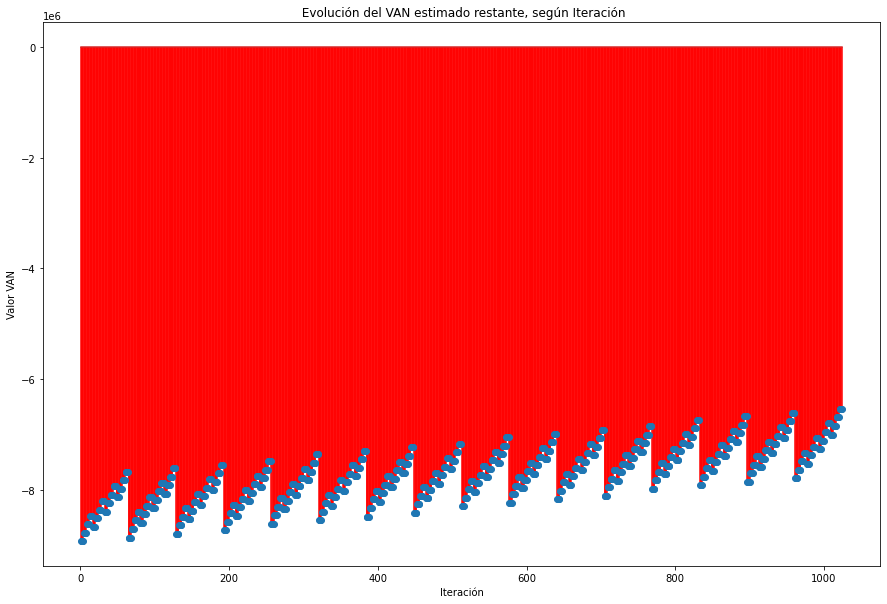

In [20]:
    titulo=' Evolución del VAN estimado restante, según Iteración'
    plt.subplots(figsize = (15, 10))
    plt.stem(dataVAN['iteracion'], dataVAN['IMPORTES_TOTALES'], "r-")
    plt.title(titulo)
    plt.xlabel('Iteración')
    plt.ylabel('Valor VAN')
    plt.savefig(rutaSalida+sheet_name+' (VAN).jpg') 
    plt.show()



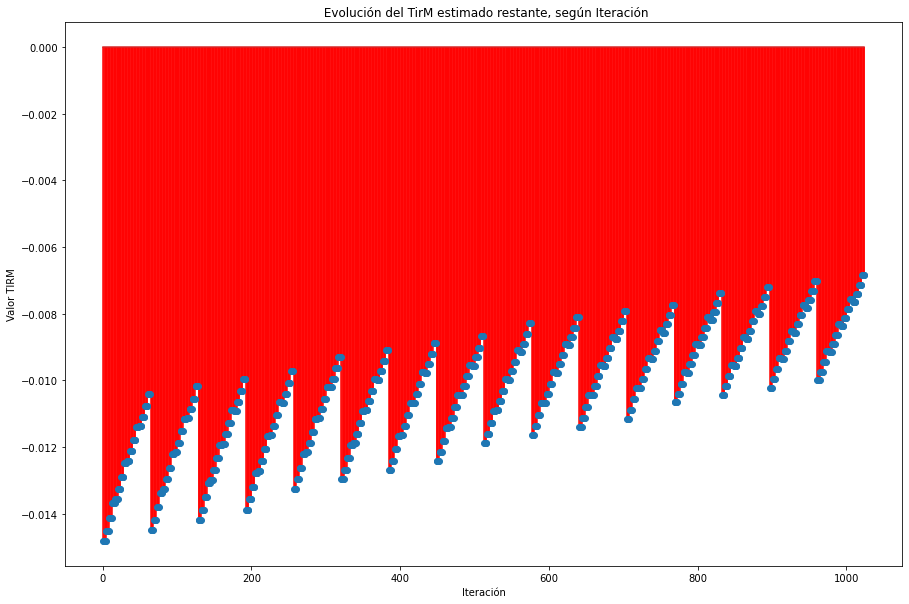

In [21]:
    titulo=' Evolución del TirM estimado restante, según Iteración'
    plt.subplots(figsize = (15, 10))
    plt.stem(dataTIRM['iteracion'], dataTIRM['IMPORTES_TOTALES'], "r-")
    plt.title(titulo)
    plt.xlabel('Iteración')
    plt.ylabel('Valor TIRM')
    plt.savefig(rutaSalida+sheet_name+' (TIRM).jpg')
    plt.show()

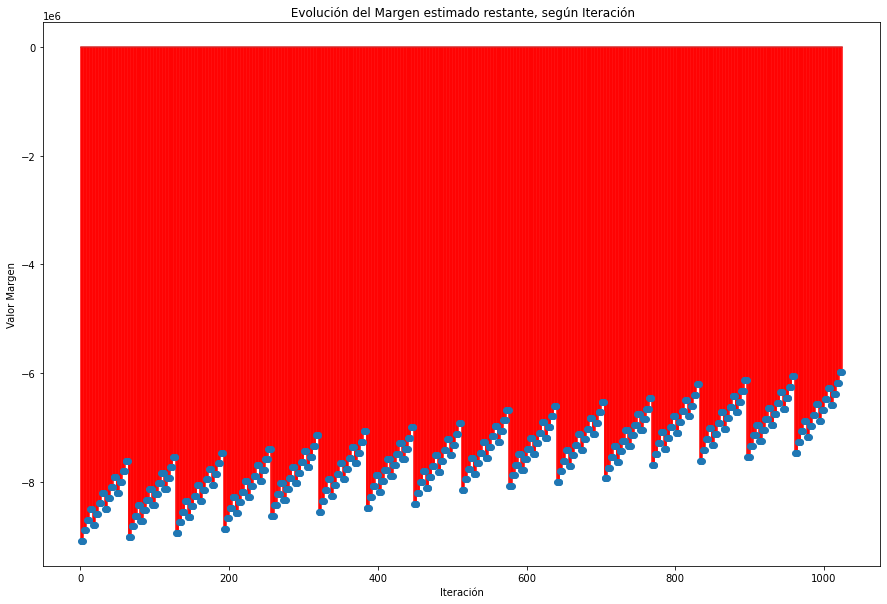

In [22]:
    titulo=' Evolución del Margen estimado restante, según Iteración'
    plt.subplots(figsize = (15, 10))
    plt.stem(dataMARGEN['iteracion'], dataMARGEN['IMPORTES_TOTALES'], "r-")
    plt.title(titulo)
    plt.xlabel('Iteración')
    plt.ylabel('Valor Margen')
    plt.savefig(rutaSalida+sheet_name+' (MARGEN).jpg') 
    plt.show()

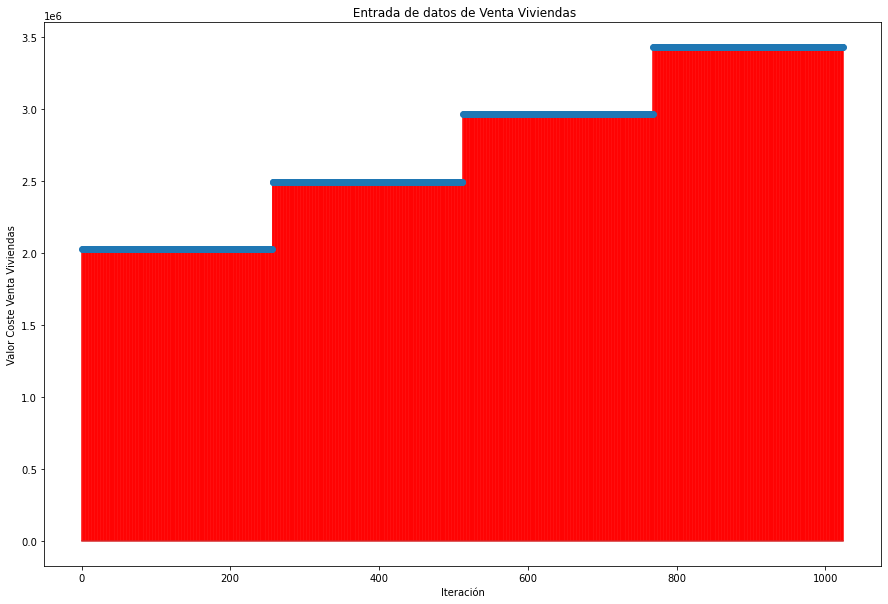

In [23]:
titulo=' Entrada de datos de Venta Viviendas'
plt.subplots(figsize = (15, 10))
plt.stem(dataVentaViviendas['iteracion'], dataVentaViviendas['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Coste Venta Viviendas')
plt.show()


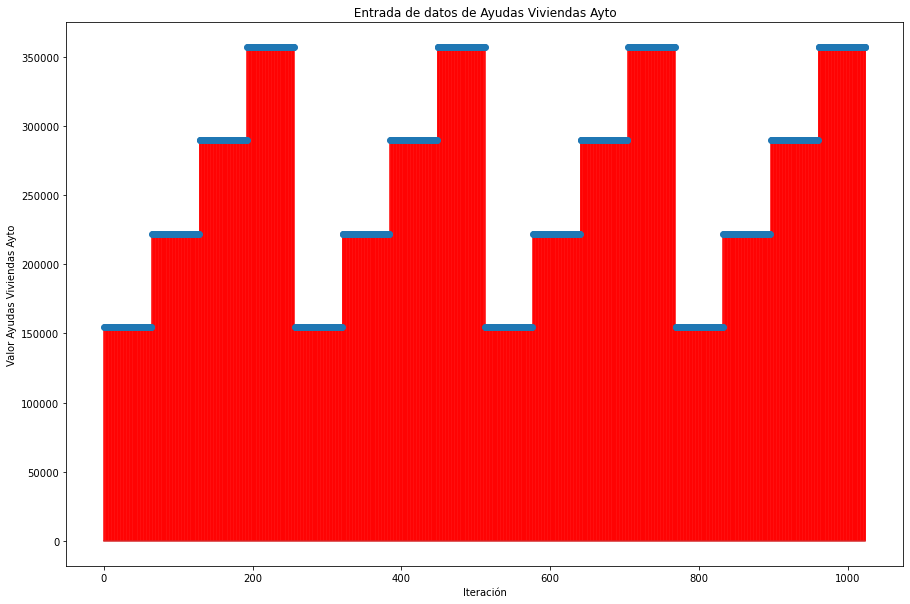

In [24]:
titulo=' Entrada de datos de Ayudas Viviendas Ayto '
plt.subplots(figsize = (15, 10))
plt.stem(dataAyudasViviendasAyto['iteracion'], dataAyudasViviendasAyto['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Ayudas Viviendas Ayto')
plt.show()

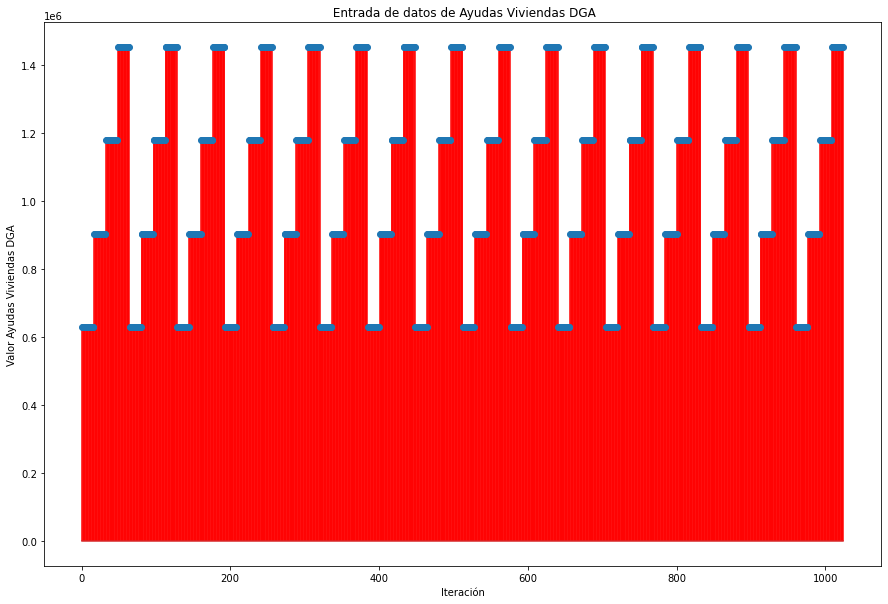

In [25]:
titulo=' Entrada de datos de Ayudas Viviendas DGA'
plt.subplots(figsize = (15, 10))
plt.stem(dataAyudasViviendasDGA['iteracion'], dataAyudasViviendasDGA['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Ayudas Viviendas DGA')
plt.show()


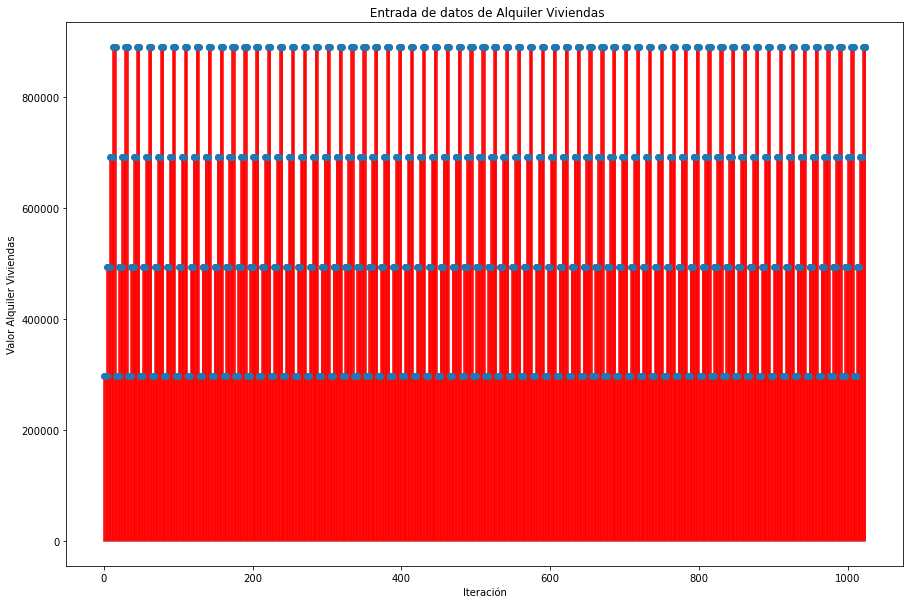

In [26]:
titulo=' Entrada de datos de Alquiler Viviendas'
plt.subplots(figsize = (15, 10))
plt.stem(dataAlquilerViviendas['iteracion'], dataAlquilerViviendas['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Alquiler Viviendas')
plt.show()


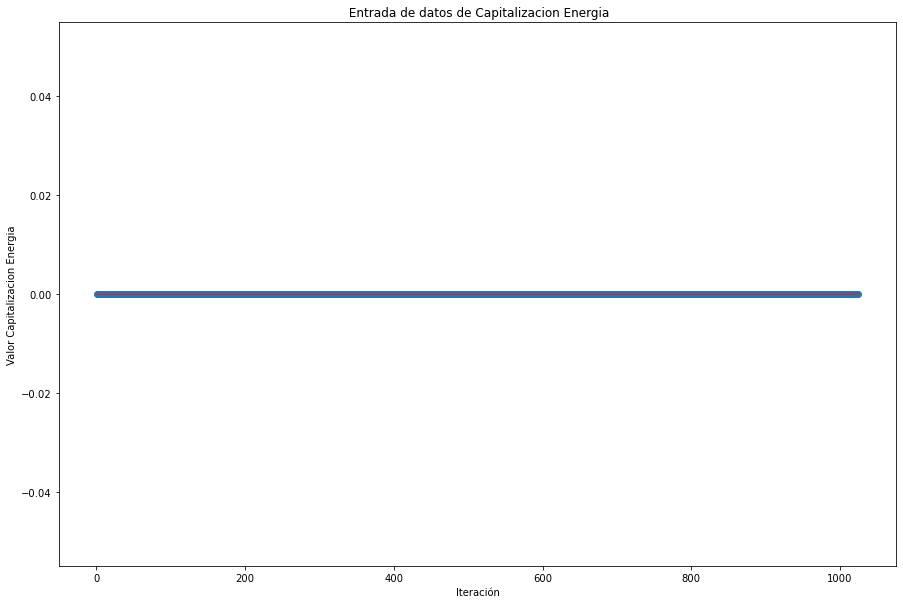

In [27]:
titulo=' Entrada de datos de Capitalizacion Energia'
plt.subplots(figsize = (15, 10))
plt.stem(dataCapitalizacionEnergia['iteracion'], dataCapitalizacionEnergia['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Capitalizacion Energia')
plt.show()

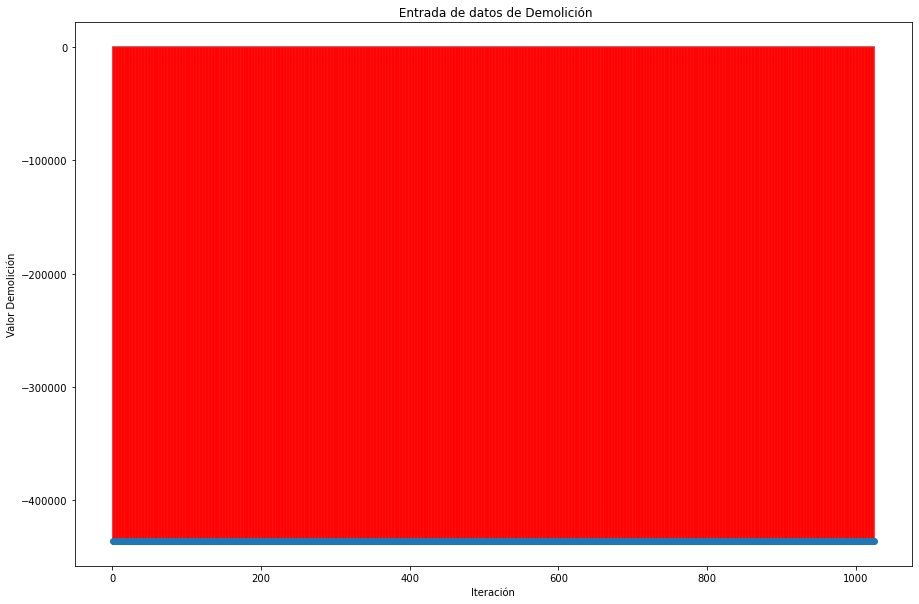

In [28]:
titulo=' Entrada de datos de Demolición'
plt.subplots(figsize = (15, 10))
plt.stem(dataDemolicion['iteracion'], dataDemolicion['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Demolición')
plt.show()

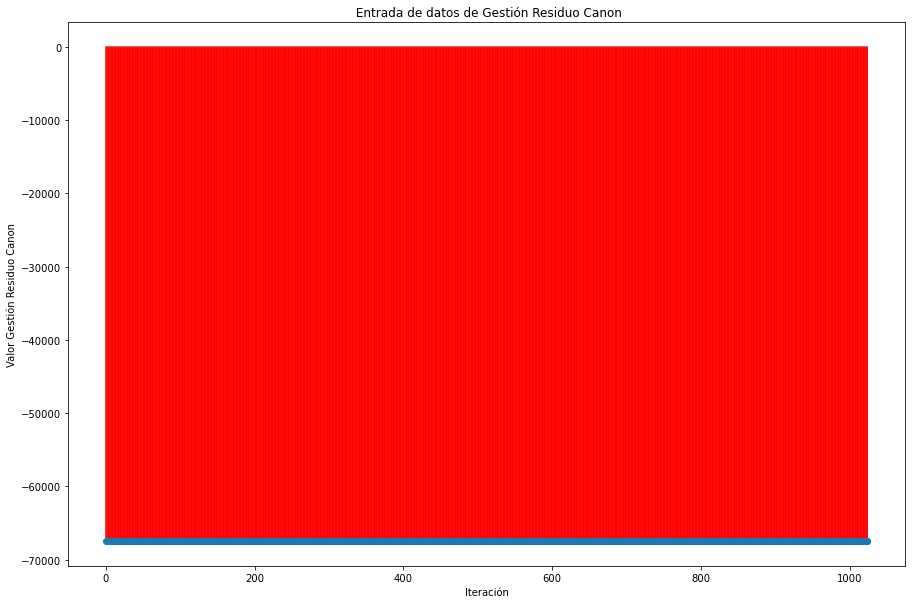

In [29]:
titulo=' Entrada de datos de Gestión Residuo Canon'
plt.subplots(figsize = (15, 10))
plt.stem(dataGestionResiduoCanon['iteracion'], dataGestionResiduoCanon['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Gestión Residuo Canon')
plt.show()

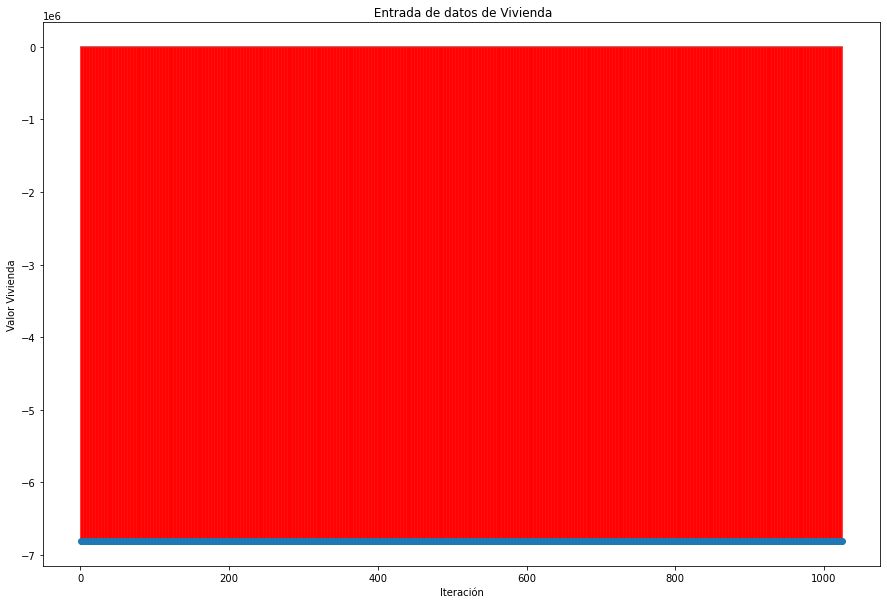

In [30]:
titulo=' Entrada de datos de Vivienda'
plt.subplots(figsize = (15, 10))
plt.stem(dataVivienda['iteracion'], dataVivienda['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Vivienda')
plt.show()

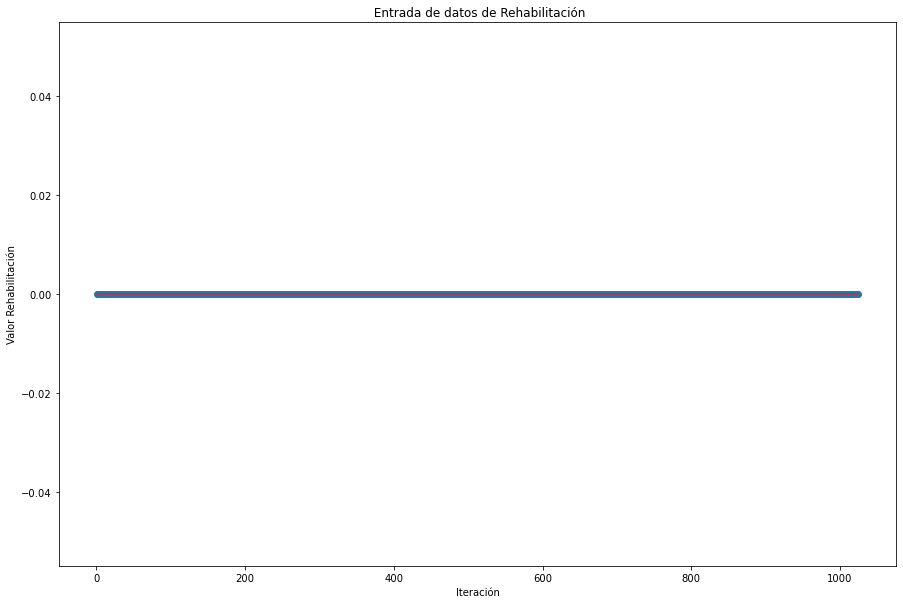

In [31]:
titulo=' Entrada de datos de Rehabilitación'
plt.subplots(figsize = (15, 10))
plt.stem(dataRehabilitacion['iteracion'], dataRehabilitacion['IMPORTES_TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Rehabilitación')
plt.show()